In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("Mall_Customers.csv")
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


### Unsupervised Learning

In [9]:
from sklearn.cluster import KMeans

In [10]:
X=data.iloc[:,3:]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [11]:
import matplotlib.pyplot as plt

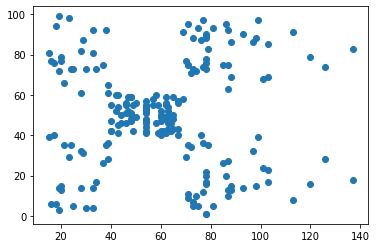

In [12]:
plt.scatter(X.iloc[:,0],X.iloc[:,1])

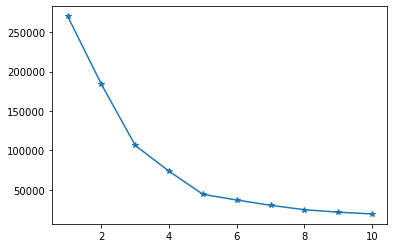

In [16]:
lst=[]
for n in range(1,11):
    kmeans=KMeans(n_clusters=n)
    kmeans.fit(X)
    lst.append(kmeans.inertia_)
plt.plot(range(1,11),lst,marker="*")
plt.show()
    

In [18]:
kmeans=KMeans(n_clusters=5)

In [19]:
kmeans.fit(X)

KMeans(n_clusters=5)

In [20]:
pred=kmeans.predict(X)
pred

array([2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1,
       2, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 3, 0, 1, 0, 3, 0, 3, 0,
       1, 0, 3, 0, 3, 0, 3, 0, 3, 0, 1, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0])

In [21]:
pred[:6]

array([2, 4, 2, 4, 2, 4])

In [22]:
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [23]:
df=pd.concat((X,pd.DataFrame(pred,columns=['group'])),axis=1)

In [24]:
df

,Annual Income (k$),Spending Score (1-100),group
0,15,39,2
1,15,81,4
2,16,6,2
3,16,77,4
4,17,40,2
...,...,...,...
195,120,79,0
196,126,28,3
197,126,74,0
198,137,18,3


In [25]:
df0=df[df.group==0]
df1=df[df.group==1]
df2=df[df.group==2]
df3=df[df.group==3]
df4=df[df.group==4]

In [26]:
kmeans.cluster_centers_

array([[86.53846154, 82.12820513],
       [55.2962963 , 49.51851852],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571],
       [25.72727273, 79.36363636]])

In [32]:
c1=kmeans.cluster_centers_[:,0]

In [33]:
c2=kmeans.cluster_centers_[:,1]

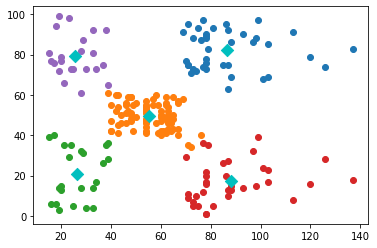

In [35]:
plt.scatter(df0["Annual Income (k$)"],df0["Spending Score (1-100)"])
plt.scatter(df1["Annual Income (k$)"],df1["Spending Score (1-100)"])
plt.scatter(df2["Annual Income (k$)"],df2["Spending Score (1-100)"])
plt.scatter(df3["Annual Income (k$)"],df3["Spending Score (1-100)"])
plt.scatter(df4["Annual Income (k$)"],df4["Spending Score (1-100)"])
plt.scatter(c1,c2,marker="D",color="c",s=75)
plt.show()